### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
#reading in data file
data = pd.read_csv('coupons.csv')

In [4]:
#exploring the data
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

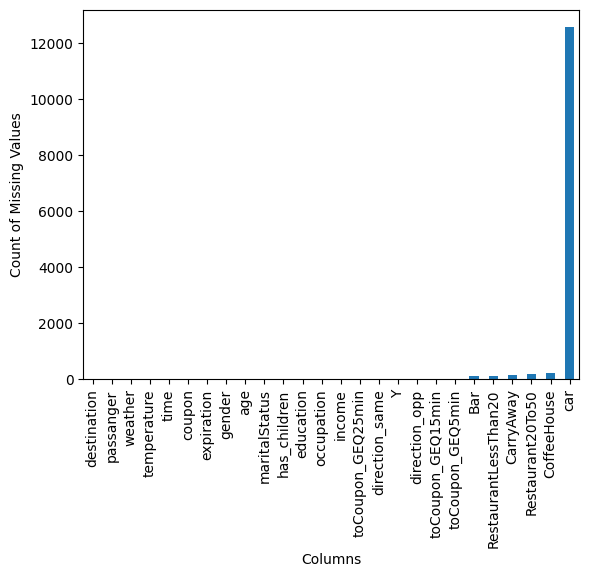

In [6]:
#clearly there is a significant amount data missing in the car column
missing_count = data.isnull().sum()
missing_count_sorted = missing_count.sort_values(ascending=True)
missing_count_sorted.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
#plt.savefig('missing_plot.png')

3. Decide what to do about your missing data -- drop, replace, other...

In [7]:
#deeper dive on the car data...it doesn't like any true way to impute the data from other variables
data['car'].value_counts()

,count
car,
Scooter and motorcycle,22
Mazda5,22
do not drive,22
crossover,21
Car that is too old to install Onstar :D,21


In [8]:
#remove cars column entirely, as making up an arbitrary substitute would not have any meaningful value
data_clean = data.drop('car',axis=1)

In [9]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [10]:
#drop rows of other data values missing values...relatively small number
data_clean = data_clean.dropna (subset= ['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50'])

In [11]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-null  ob

In [12]:
#number of rows removed...relatively small less than 5% of orignal data
data_removed = data.shape[0] - data_clean.shape[0]
print(data_removed, 'rows removed')

605 rows removed


In [13]:
#reviewing the new cleaned up dataframe
data_clean.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


In [14]:
data_clean['passanger'].value_counts()

,count
passanger,
Alone,6969
Friend(s),3148
Partner,1024
Kid(s),938


In [15]:
#making sure there are no missing values in any column of the cleaned up dataframe

In [16]:
data_clean.isnull().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


4. What proportion of the total observations chose to accept the coupon?



In [17]:
#looking at the value_counts for 'Y', accept == 1, not accept == 0
data_clean['Y'].value_counts()

,count
Y,
1,6877
0,5202


In [18]:
#calculating the overall coupon acceptance at 56.9% (question 4)
accept_count = len(data_clean[data_clean['Y'] == 1])
accept_rate = accept_count/len(data_clean['Y'])
print(accept_rate)


0.5693352098683666


5. Use a bar plot to visualize the `coupon` column.

In [19]:
#previewing the value_counts to be expected on the bar plot
data_clean['coupon'].value_counts()

,count
coupon,
Coffee House,3816
Restaurant(<20),2653
Carry out & Take away,2280
Bar,1913
Restaurant(20-50),1417


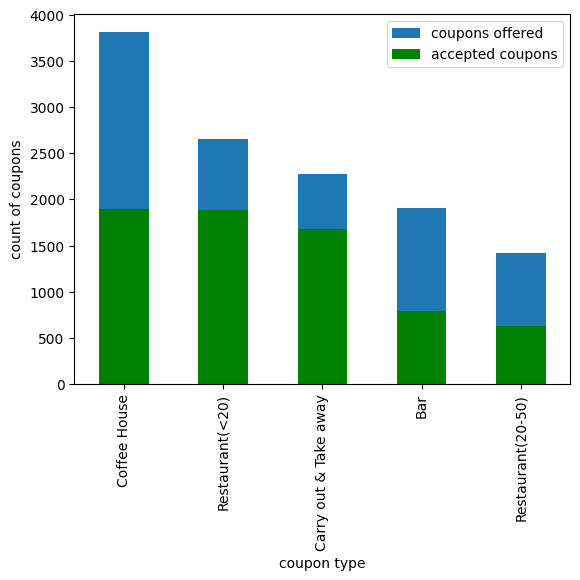

In [20]:

#bar plot of the coupon column (question 5)
data_clean['coupon'].value_counts().plot(kind='bar')
plt.xlabel('coupon type')
plt.ylabel('count of coupons')
data_clean_accept = data_clean[data_clean['Y']==1]
data_clean_not_accept = data_clean[data_clean['Y']==0]
data_clean_accept['coupon'].value_counts().plot(kind='bar',color='green')
plt.xlabel('coupon type')
plt.ylabel('count of coupons')
plt.legend(['coupons offered', 'accepted coupons'])
plt.savefig('coupon_barplot_assgn5.png')

6. Use a histogram to visualize the temperature column.

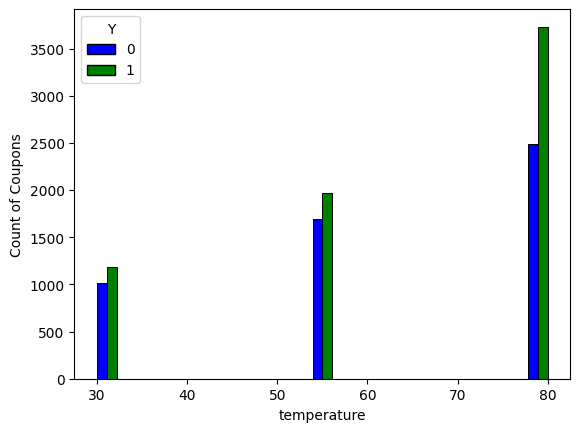

In [21]:
sns.histplot(data=data_clean, x='temperature',hue='Y',palette={0: 'blue', 1: 'green'},alpha=1,multiple='dodge')
ax = plt.gca()
ax.set(ylabel="Count of Coupons")
plt.show()
#sns.histplot(data=data_clean_accept, x='temperature' )
#ax = sns.histplot(data=data_clean_not_accept, x='temperature')
#ax.set(ylabel="Count of Coupons Accepted")

In [22]:
data_clean['temperature'].value_counts()


,count
temperature,
80,6222
55,3662
30,2195


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [23]:
data_clean_bar = data_clean[data_clean['coupon']=='Bar']
data_clean_bar.head()
data_clean_bar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1913 entries, 24 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1913 non-null   object
 1   passanger             1913 non-null   object
 2   weather               1913 non-null   object
 3   temperature           1913 non-null   int64 
 4   time                  1913 non-null   object
 5   coupon                1913 non-null   object
 6   expiration            1913 non-null   object
 7   gender                1913 non-null   object
 8   age                   1913 non-null   object
 9   maritalStatus         1913 non-null   object
 10  has_children          1913 non-null   int64 
 11  education             1913 non-null   object
 12  occupation            1913 non-null   object
 13  income                1913 non-null   object
 14  Bar                   1913 non-null   object
 15  CoffeeHouse           1913 non-null   obj

2. What proportion of bar coupons were accepted?


In [24]:
data_clean_bar_accepted = data_clean_bar[data_clean_bar['Y']==1]
bar_coupon_accept_rate = len(data_clean_bar_accepted)/len(data_clean_bar)
print('proportion of bar coupons accepted is',bar_coupon_accept_rate)


proportion of bar coupons accepted is 0.41191845269210664


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [25]:
data_clean_bar_accepted['Bar'].value_counts()

,count
Bar,
less1,247
1~3,245
never,149
4~8,114
gt8,33


In [26]:
#those who accepted and went to a bar 3 or fewer times
bar_3_or_less = data_clean_bar_accepted.query('Bar in ["less1","1~3","never"]')
bar_more_than_3 = data_clean_bar_accepted.query('Bar in ["4~8","gt8"]')

In [94]:
#calculate acceptance rate of this group against all bar coupons sent out
bar_3_or_less_accept_rate = len(bar_3_or_less)/len(data_clean_bar.query('Bar in ["less1","1~3","never"]'))
bar_more_than_3_accept_rate = len(bar_more_than_3)/len(data_clean_bar.query('Bar in ["4~8","gt8"]'))
print(bar_3_or_less_accept_rate,'is the accpetance rate of those who went to a bar 3 or fewer times a month')
print(bar_more_than_3_accept_rate,'is the accpetance rate of those who went to a bar more than 3 times a month')


0.37267441860465117 is the accpetance rate of those who went to a bar 3 or fewer times a month
0.7616580310880829 is the accpetance rate of those who went to a bar more than 3 times a month


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [28]:
data_clean_bar['age'].value_counts()

,count
age,
21,397
26,368
31,324
50plus,273
36,196
41,171
46,103
below21,81


In [29]:
#getting rid of the 50plus and below21 so string can be converted to number (added later fix code)
data_clean_bar_num = data_clean_bar
age_mapping = {
    '21': 21,
    '26': 26,
    '31': 31,
    '36': 36,
    '41': 41,
    '46': 46,
    '50plus': 50,
    'below21': 20
}
data_clean_bar_num['age'] = data_clean_bar['age'].replace(age_mapping).infer_objects(copy=False)

# Convert the column to a numeric type
data_clean_bar_num['age'] = pd.to_numeric(data_clean_bar_num['age'])

/tmp/ipython-input-2851357968.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_clean_bar_num['age'] = data_clean_bar['age'].replace(age_mapping).infer_objects(copy=False)
/tmp/ipython-input-2851357968.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean_bar_num['age'] = data_clean_bar['age'].replace(age_mapping).infer_objects(copy=False)
/tmp/ipython-input-2851357968.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [30]:
data_clean_bar = data_clean_bar_num

In [31]:
data_clean_bar_num['age'].dtype #verify age column is converted to integer values

dtype('int64')

In [32]:
#getting rid of the 50plus and below21 so string can be converted to number
data_clean_bar_accepted_age_num = data_clean_bar_accepted
age_mapping = {
    '21': 21,
    '26': 26,
    '31': 31,
    '36': 36,
    '41': 41,
    '46': 46,
    '50plus': 50,
    'below21': 20
}
data_clean_bar_accepted_age_num['age'] = data_clean_bar_accepted['age'].replace(age_mapping).infer_objects(copy=False)

# Convert the column to a numeric type
data_clean_bar_accepted_age_num['age'] = pd.to_numeric(data_clean_bar_accepted_age_num['age'])

/tmp/ipython-input-390909014.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_clean_bar_accepted_age_num['age'] = data_clean_bar_accepted['age'].replace(age_mapping).infer_objects(copy=False)
/tmp/ipython-input-390909014.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean_bar_accepted_age_num['age'] = data_clean_bar_accepted['age'].replace(age_mapping).infer_objects(copy=False)
/tmp/ipython-input-390909014.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [33]:
data_clean_bar_accepted_age_num['age'].dtype #verify age column is converted to integer values

dtype('int64')

In [34]:
#Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.
bar_gtr1_and_over_25 = data_clean_bar_accepted_age_num.query('Bar in ["4~8","1~3","gt8"] and age >25')
bar_gtr1_and_over_25_accept_rate = len(bar_gtr1_and_over_25)/len(data_clean_bar.query('Bar in ["4~8","1~3","gt8"] and age >25'))
print(bar_gtr1_and_over_25_accept_rate, 'acceptance rate between drivers who go to a bar more than once a month and are over the age of 25')

0.6898263027295285 acceptance rate between drivers who go to a bar more than once a month and are over the age of 25


In [35]:
#cheking to make sure there is no age under 25 listed in filtered
bar_gtr1_and_over_25['age'].value_counts()

,count
age,
26,122
31,61
50,42
41,21
36,20
46,12


In [91]:
#Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others
#others would include all under 25 and all ages going less than once per month
bar_less_than_1_or_under_25 = data_clean_bar_accepted_age_num.query('Bar in ["less1","never"] or age <25')
bar_less_than_1_or_under_25_rate = len(bar_less_than_1_or_under_25)/len(data_clean_bar.query('Bar in ["less1","never"] or age <25'))
print(bar_less_than_1_or_under_25_rate, 'acceptance rate for all others - less than age 25 or go to bar less than 1 time per month at all ages')

0.33774834437086093 acceptance rate for all others - less than age 25 or go to bar less than 1 time per month at all ages


In [36]:
#Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [37]:
data_clean_bar_accepted['passanger'].value_counts()

,count
passanger,
Alone,467
Friend(s),180
Partner,101
Kid(s),40


In [38]:
data_clean_bar_accepted['occupation'].value_counts()

,count
occupation,
Student,114
Unemployed,87
Computer & Mathematical,80
Sales & Related,78
Management,60
Office & Administrative Support,50
Business & Financial,41
Education&Training&Library,38
Healthcare Support,29


In [93]:


#filter the out the coupon accepted data
bar_more_than_1_and_no_kid = data_clean_bar_accepted.query('Bar in ["1~3","4~8","gt8"]'and 'passanger in ["Alone", "Friend(s)","Partner"]')
bar_more_than_1_and_no_kid_no_fff = bar_more_than_1_and_no_kid[bar_more_than_1_and_no_kid['occupation']!= 'Farming Fishing & Forestry']

#filter the coupon offered data
data_clean_bar_no_fff = data_clean_bar[data_clean_bar['occupation']!= 'Farming Fishing & Forestry']

#compute the rate of acceptance among the group
bar_more_than_1_and_no_kid_no_fff_rate = len(bar_more_than_1_and_no_kid_no_fff)/len(data_clean_bar_no_fff.query('Bar in ["1~3","4~8","gt8"]'and 'passanger in ["Alone", "Friend(s)","Partner"]'))
print(bar_more_than_1_and_no_kid_no_fff_rate,'acceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.')



0.4349095154699358 acceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [42]:
bar_more_than_1_and_no_kid['maritalStatus'].value_counts()

,count
maritalStatus,
Single,350
Married partner,240
Unmarried partner,135
Divorced,16
Widowed,7


In [74]:
#go to bars more than once a month, had passengers that were not a kid, and were not widowed
bars_not_widowed = bar_more_than_1_and_no_kid[bar_more_than_1_and_no_kid['maritalStatus']!= 'Widowed']
data_clean_bar_not_widowed = data_clean_bar[data_clean_bar['maritalStatus']!= 'Widowed']
bars_not_widowed_rate = len(bars_not_widowed)/len(data_clean_bar_not_widowed.query('passanger in ["Alone", "Friend(s)","Partner"]'))
print(bars_not_widowed_rate,'is the acceptance rate of bar coupon for passengers that were not a kid, and were not widowed')

0.43537015276145713 is the acceptance rate of bar coupon for passengers that were not a kid, and were not widowed


In [76]:
#go to bars more than once a month and are under the age of 30
bars_under_30 = data_clean_bar_accepted_age_num.query('Bar in ["4~8","1~3","gt8"] and age <30')
bars_under_30_rate = len(bars_under_30)/len(data_clean_bar.query('Bar in ["4~8","1~3","gt8"] and age <30'))
print(bars_under_30_rate,'acceptance rate of bar coupon for go to bars more than once a month and are under the age of 30')

0.7195121951219512 acceptance rate of bar coupon for go to bars more than once a month and are under the age of 30


In [45]:
#checking all ages above are under 30
bars_under_30 ['age'].value_counts()

,count
age,
26,122
21,110
20,4


In [77]:
#go to cheap restaurants more than 4 times a month and income is less than 50K
data_clean_bar_accepted['income'].value_counts()

,count
income,
$25000 - $37499,136
$100000 or More,135
$12500 - $24999,114
$50000 - $62499,101
$37500 - $49999,90
Less than $12500,73
$75000 - $87499,54
$62500 - $74999,46
$87500 - $99999,39


In [47]:
data_clean_bar_accepted['RestaurantLessThan20'].value_counts()

,count
RestaurantLessThan20,
1~3,338
4~8,230
less1,119
gt8,85
never,16


In [80]:
#calculate the acceptance rate for go to cheap restaurants more than 4 times a month and income is less than 50K
income_less_than_50k = data_clean_bar_accepted.query('RestaurantLessThan20 in ["4~8","gt8"] and income in ["Less than $12500","$12500 - $24999","$25000 - $37499","$37500 - $49999"]')
income_less_than_50k_rate = len(income_less_than_50k)/len(data_clean_bar.query('RestaurantLessThan20 in ["4~8","gt8"] and income in ["Less than $12500","$12500 - $24999","$25000 - $37499","$37500 - $49999"]'))
print(income_less_than_50k_rate,'acceptance rate for go to cheap restaurants more than 4 times a month and income is less than 50K')



0.45645645645645644 acceptance rate for go to cheap restaurants more than 4 times a month and income is less than 50K


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [92]:
#exploring one other option for the bar coupons
bar_coupons_accepted_with_kids = data_clean_bar_accepted[data_clean_bar_accepted['passanger']== 'Kid(s)']
data_clean_with_kids = data_clean_bar[data_clean_bar['passanger']== 'Kid(s)']
bar_coupons_accepted_with_kids_rate = len(bar_coupons_accepted_with_kids)/len(data_clean_with_kids)
print(bar_coupons_accepted_with_kids_rate, 'is overall acceptance rate with kid passengers')

0.20618556701030927 is overall acceptance rate with kid passengers


In [50]:
#Some of my conclusions (hypothesis) regarding the bar coupon:
#Temperature (weather) was a factor in general acceptance of all coupons
#The bar coupon had a lower overall accpetance rate than some of the other coupon types, such as carry out & take away or the inexpensive restaurants
#In comparison with the overall bar coupon acceptance rate of 41%, it was noted:
#Bar coupon had low acceptance when kids were passengers
#People who went to bars more than 1 time per month and were under 30 were likely to accept
#People who went to bars more than 1 time per month and were over 25 were likely to accept
#So I would conclude, 25-30 years of age and go to bars more than 1 time per month likely to accept
#All ages people went to bars 3 or more times most likely to accept
#People below age 25 and go to bars less than 1 time did were not as likely to accept



### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [51]:
#From the graph above it looks like the CarryAway coupon group would be interesting to explore.  It appears to be the most popularly accepted coupon.



In [52]:
data_clean_CarryAway = data_clean[data_clean['coupon']=='Carry out & Take away']
data_clean_CarryAway.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2280 entries, 25 to 12680
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2280 non-null   object
 1   passanger             2280 non-null   object
 2   weather               2280 non-null   object
 3   temperature           2280 non-null   int64 
 4   time                  2280 non-null   object
 5   coupon                2280 non-null   object
 6   expiration            2280 non-null   object
 7   gender                2280 non-null   object
 8   age                   2280 non-null   object
 9   maritalStatus         2280 non-null   object
 10  has_children          2280 non-null   int64 
 11  education             2280 non-null   object
 12  occupation            2280 non-null   object
 13  income                2280 non-null   object
 14  Bar                   2280 non-null   object
 15  CoffeeHouse           2280 non-null   obj

In [95]:
#step one - look at the overall acc
data_clean_CarryAway_accepted = data_clean_CarryAway[data_clean_CarryAway['Y']==1]
CarryAway_coupon_accept_rate = len(data_clean_CarryAway_accepted)/len(data_clean_CarryAway)
print(CarryAway_coupon_accept_rate,'is the overall acceptance rate of the CarryAway coupon')

0.737719298245614 is the overall acceptance rate of the CarryAway coupon


In [54]:
data_clean_CarryAway_accepted['CarryAway'].value_counts()

,count
CarryAway,
1~3,614
4~8,590
less1,233
gt8,223
never,22


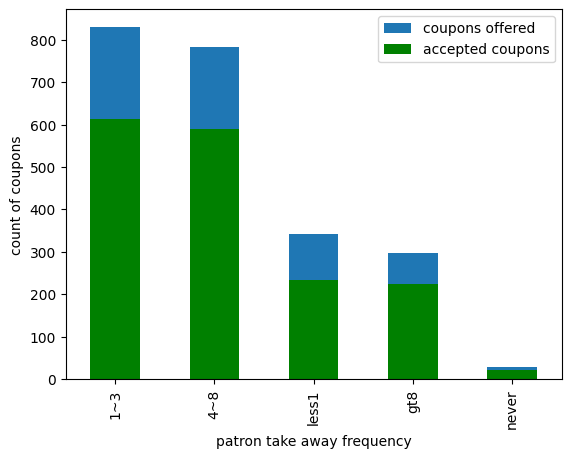

In [55]:
#graphical comparisons showing the patron frequency and acceptance...interesting that few people never get CarryAway but when offered a coupon they all accepted
data_clean_CarryAway['CarryAway'].value_counts().plot(kind='bar')
data_clean_CarryAway_accepted['CarryAway'].value_counts().plot(kind='bar',color='green')
plt.xlabel('patron take away frequency')
plt.ylabel('count of coupons')
plt.legend(['coupons offered', 'accepted coupons'])

#plt.savefig('coupon_barplot_assgn5.png')

In [96]:
#compare those who go 4 or more times per month with the others
CarryAway_4_or_more = data_clean_CarryAway_accepted.query('CarryAway in ["4~8","gt8"]')
CarryAway_4_or_more_accept_rate = len(CarryAway_4_or_more)/len(data_clean_CarryAway.query('CarryAway in ["4~8","gt8"]'))
print(CarryAway_4_or_more_accept_rate,'acceptance rate of those who go 4 or more times per month')

0.7534754402224282 acceptance rate of those who go 4 or more times per month


In [97]:
#those who go 3 or less times per month
CarryAway_3_or_less = data_clean_CarryAway_accepted.query('CarryAway in ["less1","1~3"]')
CarryAway_3_or_less_accept_rate = len(CarryAway_3_or_less)/len(data_clean_CarryAway.query('CarryAway in ["less1","1~3"]'))
print(CarryAway_3_or_less_accept_rate,'acceptance rate of those who go 3 or less times per month')

0.722080136402387 acceptance rate of those who go 3 or less times per month


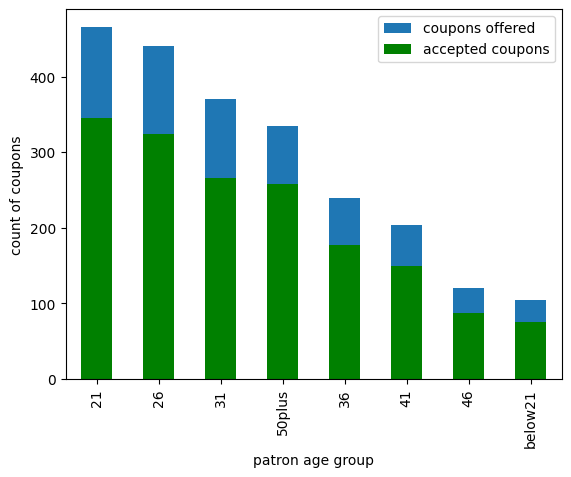

In [56]:
data_clean_CarryAway['age'].value_counts().plot(kind='bar')
data_clean_CarryAway_accepted['age'].value_counts().plot(kind='bar',color='green')
plt.xlabel('patron age group')
plt.ylabel('count of coupons')
plt.legend(['coupons offered', 'accepted coupons'])

In [98]:
#compare age 31 and under with others
CarryAway_31_and_under = data_clean_CarryAway_accepted.query('age in ["21","26","31"]')
CarryAway_31_and_under_accept_rate = len(CarryAway_31_and_under)/len(data_clean_CarryAway.query('age in ["21","26","31"]'))
print(CarryAway_31_and_under_accept_rate,'acceptance rate of those who are 31 and under')

0.7321848081440877 acceptance rate of those who are 31 and under


In [99]:
#compare age 36 and over
CarryAway_36_and_over = data_clean_CarryAway_accepted.query('age in ["36","41","46"]')
CarryAway_36_and_over_accept_rate = len(CarryAway_36_and_over)/len(data_clean_CarryAway.query('age in ["36","41","46"]'))
print(CarryAway_36_and_over_accept_rate,'acceptance rate of those who are 36 and over')

0.7340425531914894 acceptance rate of those who are 36 and over


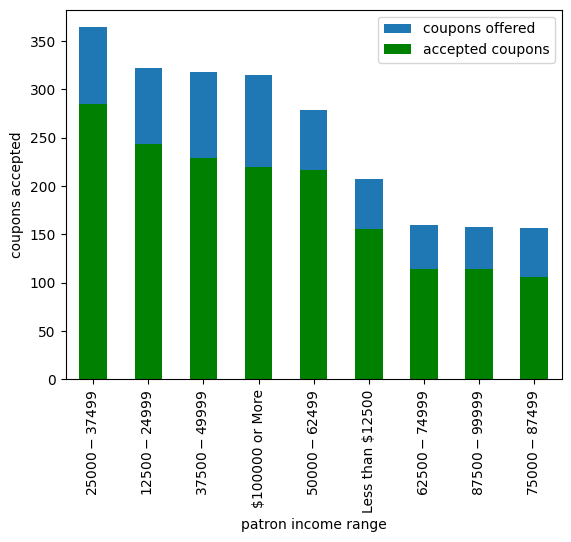

In [57]:
data_clean_CarryAway['income'].value_counts().plot(kind='bar')
data_clean_CarryAway_accepted['income'].value_counts().plot(kind='bar',color='green')
plt.xlabel('patron income range')
plt.ylabel('coupons accepted')
plt.legend(['coupons offered', 'accepted coupons'])

In [110]:
#compare income under $50k with others
CarryAway_50k_and_under = data_clean_CarryAway_accepted.query('income in ["Less than $12500","12500 - 24999",37500-49999]')
CarryAway_50k_and_under_accept_rate = len(CarryAway_50k_and_under)/len(data_clean_CarryAway.query('income in ["Less than $12500","12500 - 24999",37500-49999]'))
print(CarryAway_50k_and_under_accept_rate,'acceptance rate of those who have income under $50k')

0.748792270531401 acceptance rate of those who have income under $50k


In [115]:
#compare income over $50k with others
CarryAway_50k_over = data_clean_CarryAway_accepted.query('income in ["50000 - 62499","62500 - 74999","75000 - 87499","87500 - 99999","$100000 or More"]')
CarryAway_50k_over_accept_rate = len(CarryAway_50k_over)/len(data_clean_CarryAway.query('income in ["50000 - 62499","62500 - 74999","75000 - 87499","87500 - 99999","$100000 or More"]'))
print(CarryAway_50k_over_accept_rate,'acceptance rate of those who have income over $50k')

0.6984126984126984 acceptance rate of those who have income over $50k


In [120]:
data_clean_CarryAway.shape

(2280, 25)

In [58]:
#nothing interesting in gender data...pretty much dead even distribution of acceptance
data_clean_CarryAway_accepted['gender'].value_counts()

,count
gender,
Male,841
Female,841


In [101]:
data_clean_CarryAway['gender'].value_counts()

,count
gender,
Female,1176
Male,1104


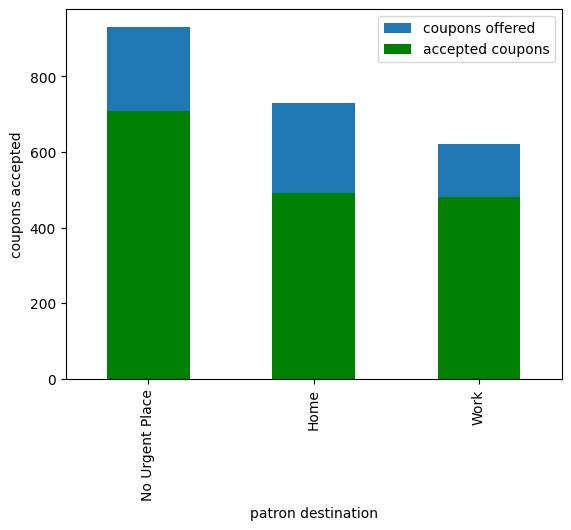

In [60]:
data_clean_CarryAway['destination'].value_counts().plot(kind='bar')
data_clean_CarryAway_accepted['destination'].value_counts().plot(kind='bar',color='green')
plt.xlabel('patron destination')
plt.ylabel('coupons accepted')
plt.legend(['coupons offered', 'accepted coupons'])

In [118]:
#compare destination work with others
CarryAway_work = data_clean_CarryAway_accepted.query('destination in ["Work"]')
CarryAway_work_accept_rate = len(CarryAway_work)/len(data_clean_CarryAway.query('destination in ["Work"]'))
print(CarryAway_work_accept_rate,'acceptance rate of those who go to work')

0.6611796982167353 acceptance rate of those who go to work


In [119]:
#compare destination home or no urgent place with others
CarryAway_home = data_clean_CarryAway_accepted.query('destination in ["Home","No Urgent Place"]')
CarryAway_home_accept_rate = len(CarryAway_home)/len(data_clean_CarryAway.query('destination in ["Home","No Urgent Place"]'))
print(CarryAway_home_accept_rate,'acceptance rate of those who go to home or no urgent place')

0.7736943907156673 acceptance rate of those who go to home or no urgent place


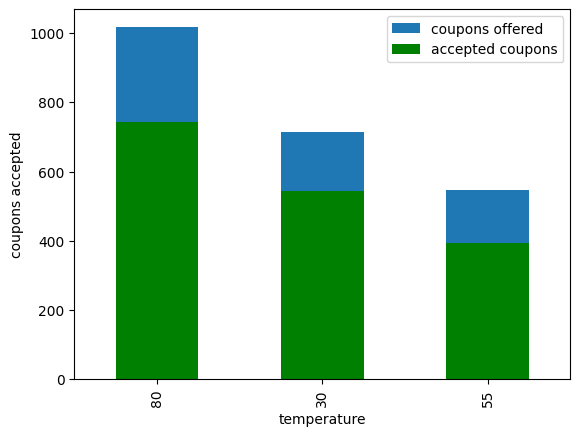

In [61]:
data_clean_CarryAway['temperature'].value_counts().plot(kind='bar')
data_clean_CarryAway_accepted['temperature'].value_counts().plot(kind='bar',color='green')
plt.xlabel('temperature')
plt.ylabel('coupons accepted')
plt.legend(['coupons offered', 'accepted coupons'])

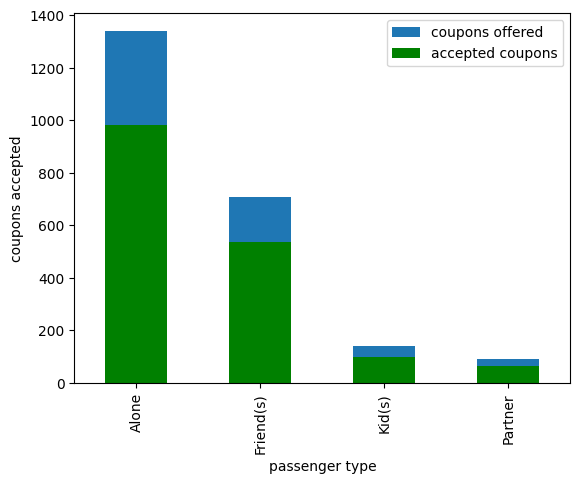

In [116]:
data_clean_CarryAway['passanger'].value_counts().plot(kind='bar')
data_clean_CarryAway_accepted['passanger'].value_counts().plot(kind='bar',color='green')
plt.xlabel('passenger type')
plt.ylabel('coupons accepted')
plt.legend(['coupons offered', 'accepted coupons'])

In [121]:
#compare passanger alone with others
CarryAway_alone = data_clean_CarryAway_accepted.query('passanger in ["Alone"]')
CarryAway_alone_accept_rate = len(CarryAway_alone)/len(data_clean_CarryAway.query('passanger in ["Alone"]'))
print(CarryAway_alone_accept_rate,'acceptance rate of those who are alone')

0.7318894697535474 acceptance rate of those who are alone


In [122]:
#compare passanger kid or friend or partner with others
CarryAway_with_others = data_clean_CarryAway_accepted.query('passanger in ["Friend(s)","Kid(s)","Partner"]')
CarryAway_with_others_accept_rate = len(CarryAway_with_others)/len(data_clean_CarryAway.query('passanger in ["Friend(s)","Kid(s)","Partner"]'))
print(CarryAway_with_others_accept_rate,'acceptance rate of those who are with others')

0.7460148777895855 acceptance rate of those who are with others


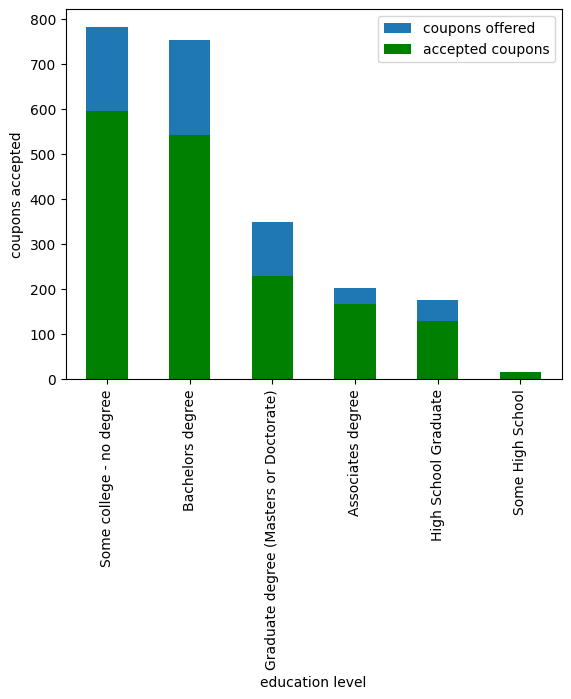

In [63]:
data_clean_CarryAway['education'].value_counts().plot(kind='bar')
data_clean_CarryAway_accepted['education'].value_counts().plot(kind='bar',color='green')
plt.xlabel('education level')
plt.ylabel('coupons accepted')
plt.legend(['coupons offered', 'accepted coupons'])

In [125]:
data_clean_CarryAway['education'].value_counts()

,count
education,
Some college - no degree,783
Bachelors degree,754
Graduate degree (Masters or Doctorate),350
Associates degree,202
High School Graduate,175
Some High School,16


In [126]:
#compare education Associates degree, High School Graduate, Some High School, Some college - no degree with others
CarryAway_associates = data_clean_CarryAway_accepted.query('education in ["Associates degree","High School Graduate","Some High School","Some college - no degree"]')
CarryAway_associates_accept_rate = len(CarryAway_associates)/len(data_clean_CarryAway.query('education in ["Associates degree","High School Graduate","Some High School","Some college - no degree"]'))
print(CarryAway_associates_accept_rate,'acceptance rate of those who have associates degree, High School Graduate, Some High School, Some college - no degree')

0.7729591836734694 acceptance rate of those who have associates degree, High School Graduate, Some High School, Some college - no degree


In [127]:
#compare education Bachelors degree, Graduate degree (Masters or Doctorate) with others
CarryAway_bachelors = data_clean_CarryAway_accepted.query('education in ["Bachelors degree","Graduate degree (Masters or Doctorate)"]')
CarryAway_bachelors_accept_rate = len(CarryAway_bachelors)/len(data_clean_CarryAway.query('education in ["Bachelors degree","Graduate degree (Masters or Doctorate)"]'))
print(CarryAway_bachelors_accept_rate,'acceptance rate of those who have Bachelors degree, Graduate degree (Masters or Doctorate)')

0.7001811594202898 acceptance rate of those who have Bachelors degree, Graduate degree (Masters or Doctorate)


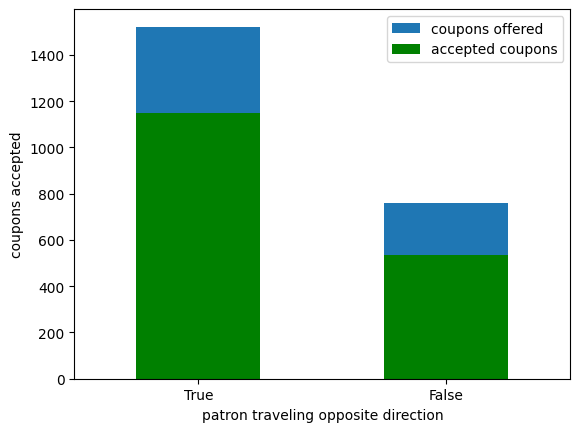

In [131]:

data_clean_CarryAway['direction_opp'].value_counts().plot(kind='bar')
data_clean_CarryAway_accepted['direction_opp'].value_counts().plot(kind='bar',color='green')
plt.xlabel('patron traveling opposite direction')
plt.ylabel('coupons accepted')
plt.legend(['coupons offered', 'accepted coupons'])
plt.xticks(ticks=[1,0], labels=['False', 'True'], rotation=0) # Add this line to change x-axis labels
plt.show()

In [132]:
data_clean_CarryAway['direction_opp'].value_counts()

,count
direction_opp,
1,1522
0,758


In [133]:
data_clean_CarryAway['direction_opp'].dtype

dtype('int64')

In [145]:
#compare direction_opp
CarryAway_opposite = data_clean_CarryAway_accepted.query('direction_opp ==1')
CarryAway_opposite_accept_rate = len(CarryAway_opposite)/len(data_clean_CarryAway.query('direction_opp ==1'))
print(CarryAway_opposite_accept_rate,'acceptance rate of those who travel opposite direction')

0.7536136662286466 acceptance rate of those who travel opposite direction


In [147]:
#compare direction_same
CarryAway_same = data_clean_CarryAway_accepted.query('direction_same ==1')
CarryAway_same_accept_rate = len(CarryAway_same)/len(data_clean_CarryAway.query('direction_same ==1'))
print(CarryAway_opposite_accept_rate,'acceptance rate of those who travel same direction')

0.7058047493403694 acceptance rate of those who travel same direction


In [145]:
#Summary of conclusions for CarryAway
#Overall accpetance is high at over 73.7%
#People who get carryout more than 4 times per month had slightly higher accpetance rate of 75.3%
#People with incomes under $50K were more likely to accept by 5% margin
#Interesting that travel in the same direction was not favorable for accepting coupon
#People who were going home or had no urgent place to go were more likely to accept than those going to work
#People without bachelors degrees or higher accepted more than those with such degrees
